In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
data=pd.read_csv('/content/fetal_health.csv')

In [4]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [8]:
data.shape

(2126, 22)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


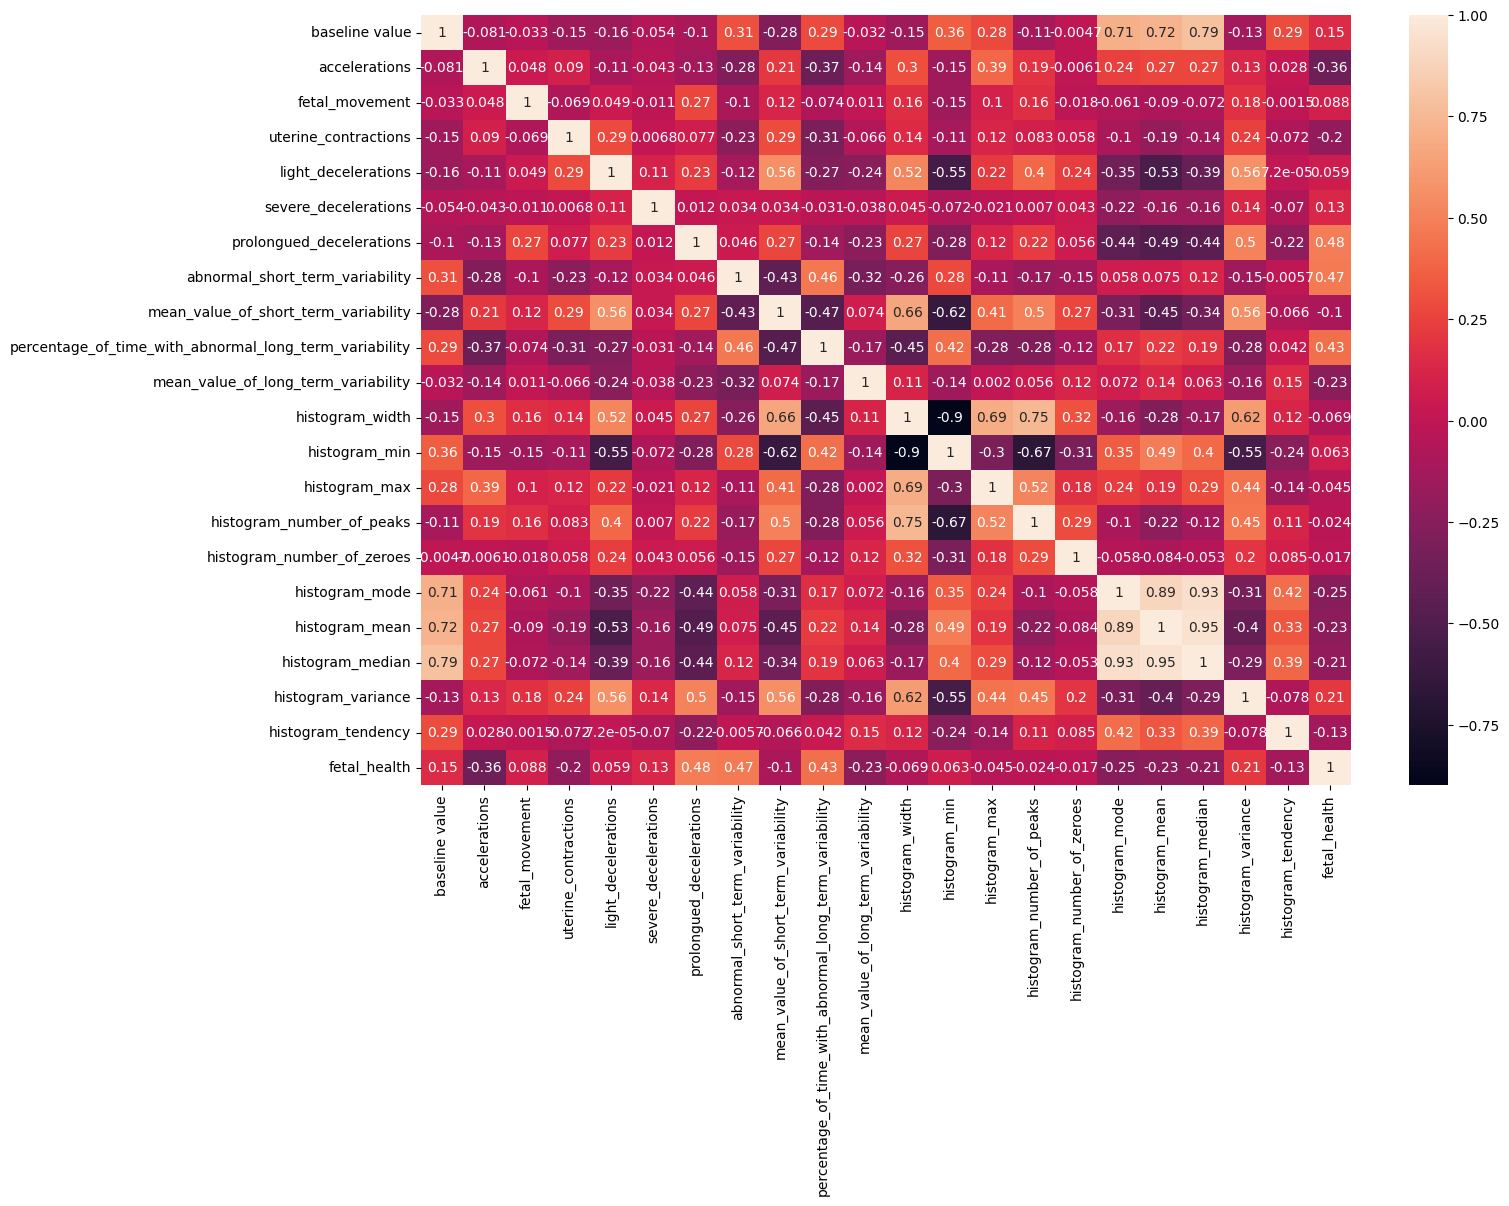

In [9]:
corr = data.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)
plt.show()

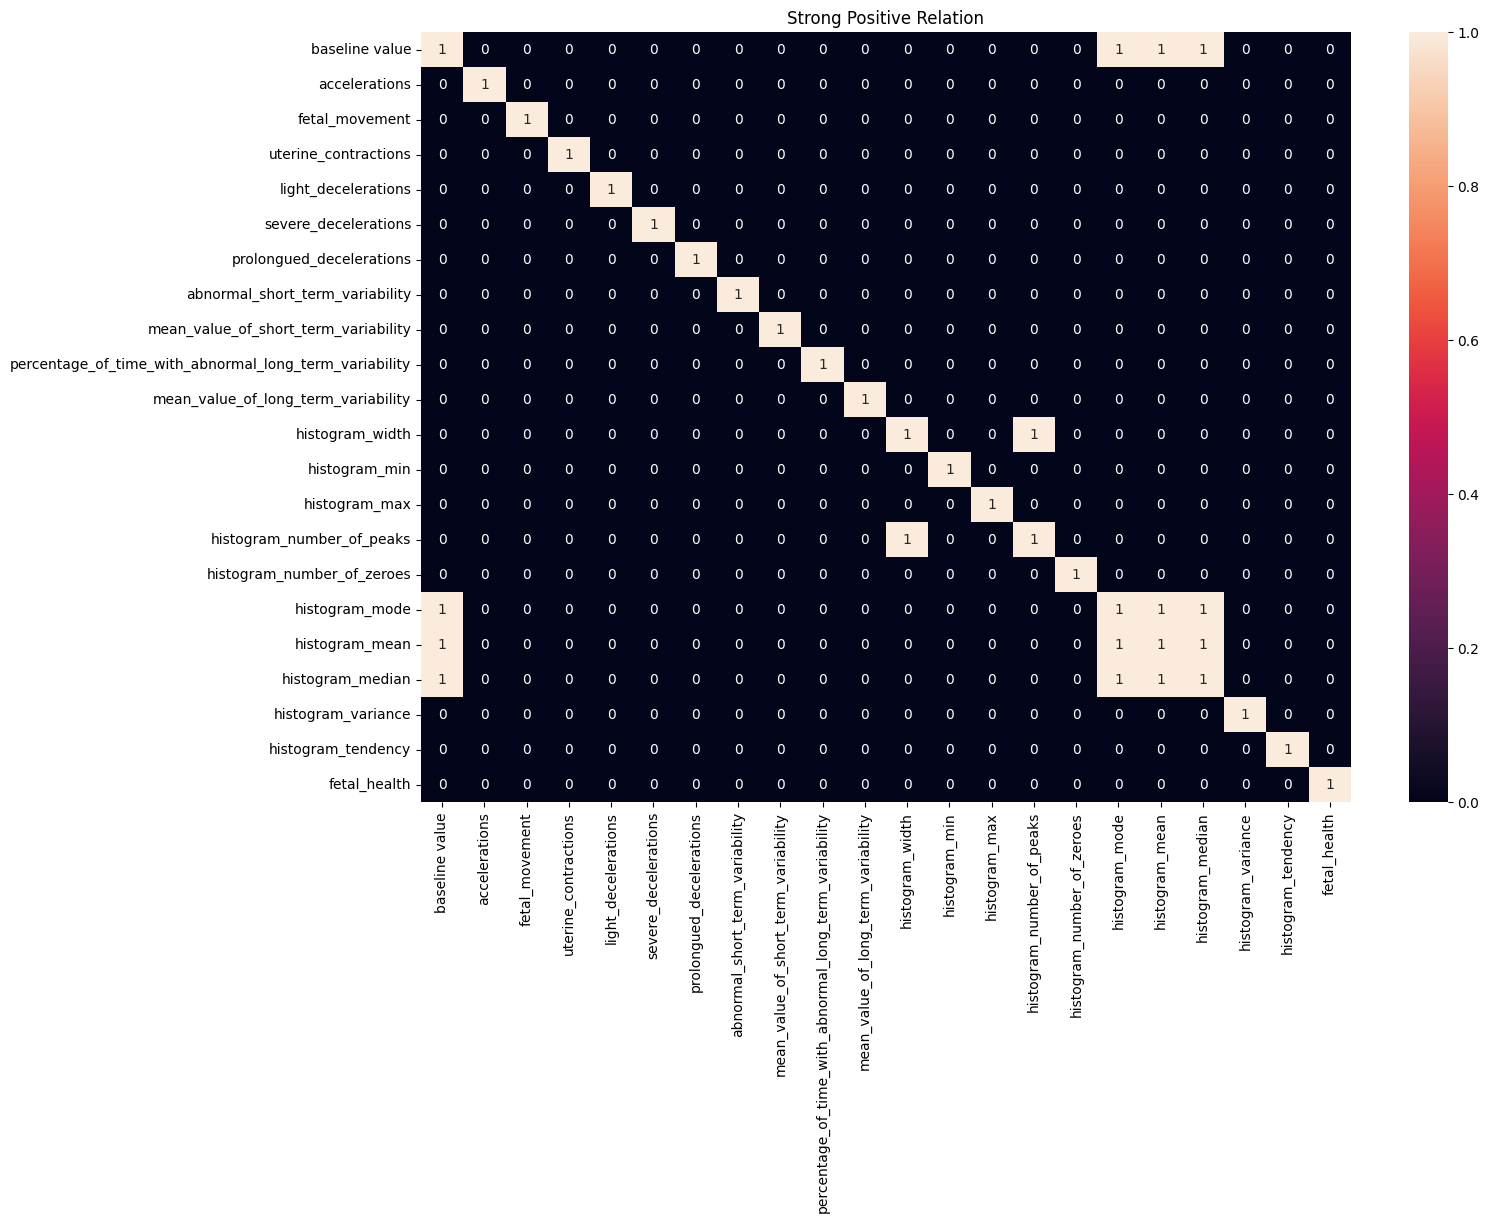

In [10]:
corr = data.corr()
corr = (corr>=0.7).astype('int')

plt.figure(figsize=(15,10))
plt.title("Strong Positive Relation")
sns.heatmap(corr, annot=True)
plt.show()

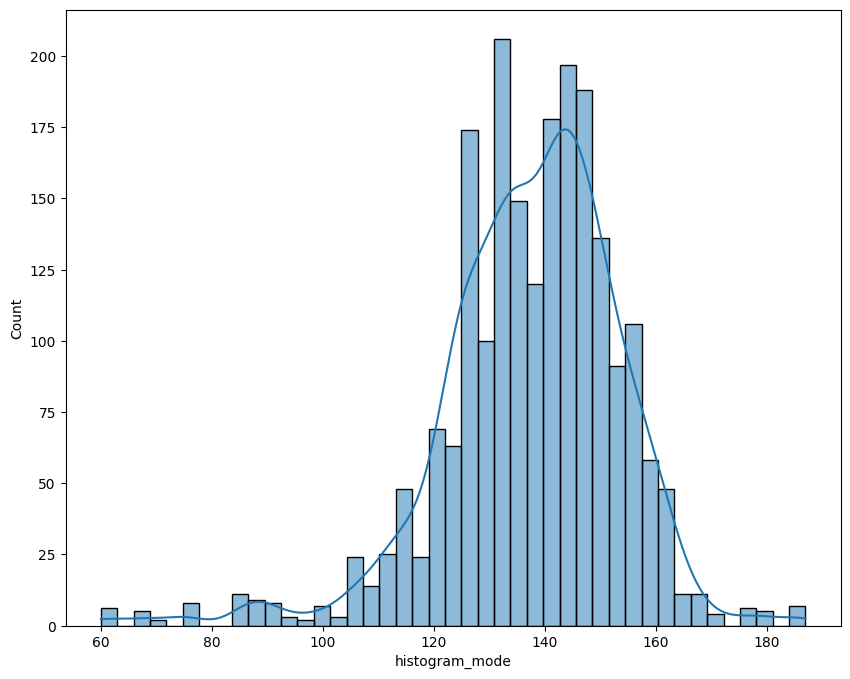

In [11]:
plt.figure(figsize=(10,8))
sns.histplot(data['histogram_mode'], kde=True)
plt.show()

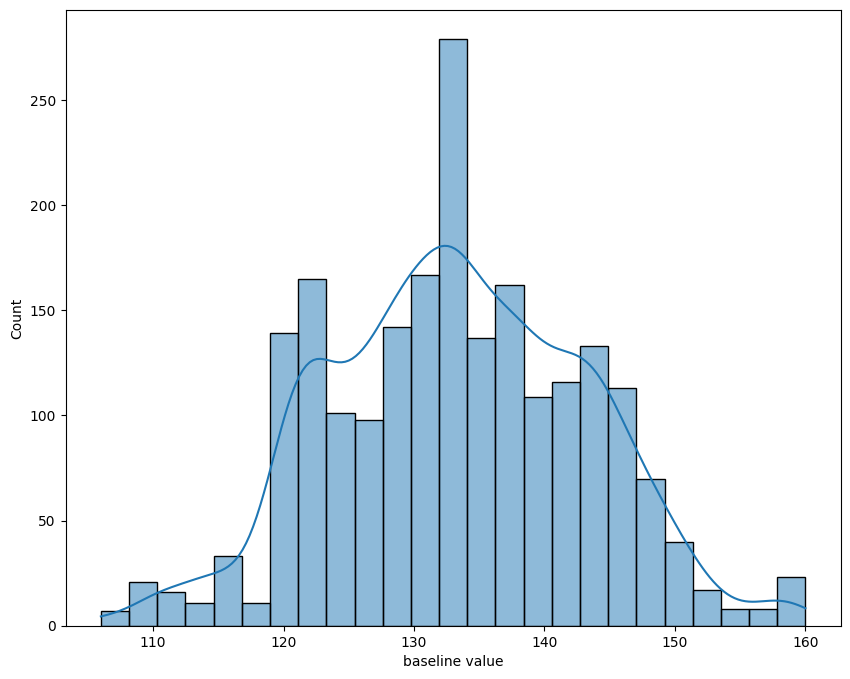

In [12]:
plt.figure(figsize=(10,8))
sns.histplot(data['baseline value'], kde=True)
plt.show()

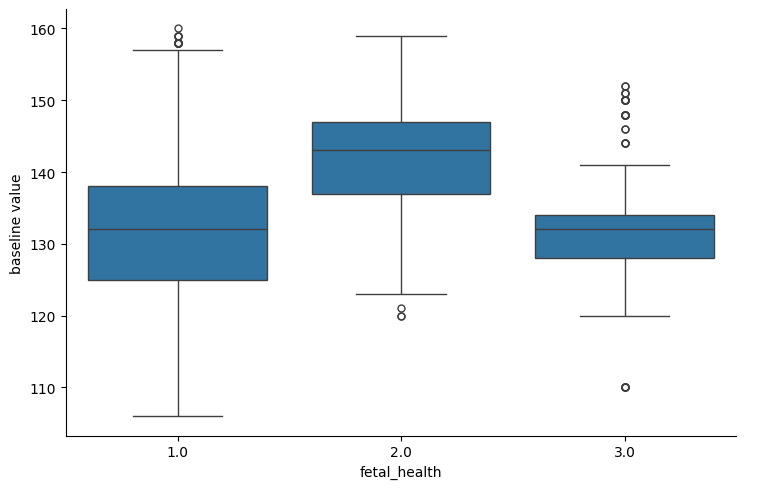

In [13]:
sns.catplot(
    data=data,
    y='baseline value',
    x='fetal_health',
    kind='box',
    aspect=1.5
)
plt.show()

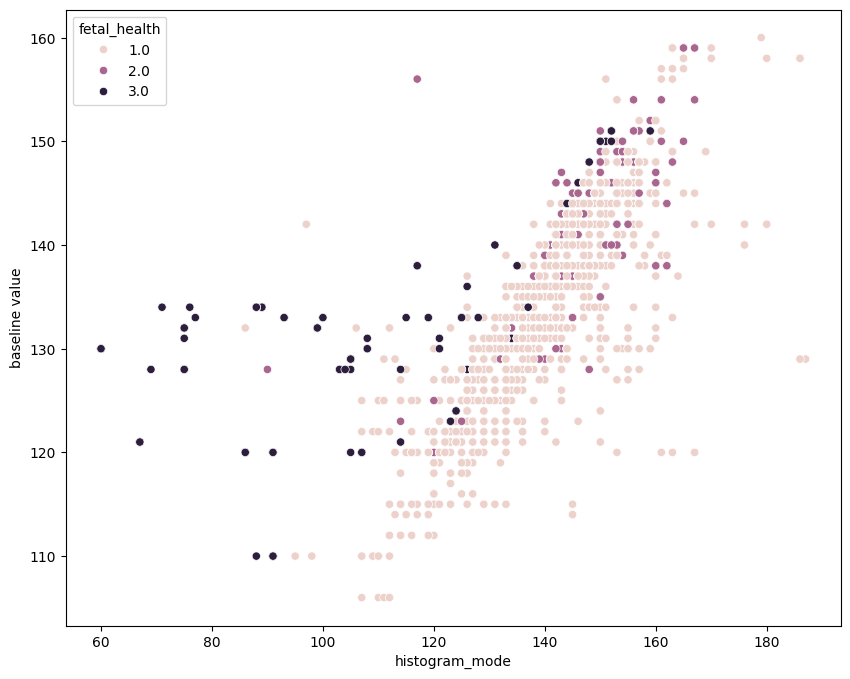

In [14]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    data=data,
    x='histogram_mode',
    y='baseline value',
    hue='fetal_health'
)
plt.show()

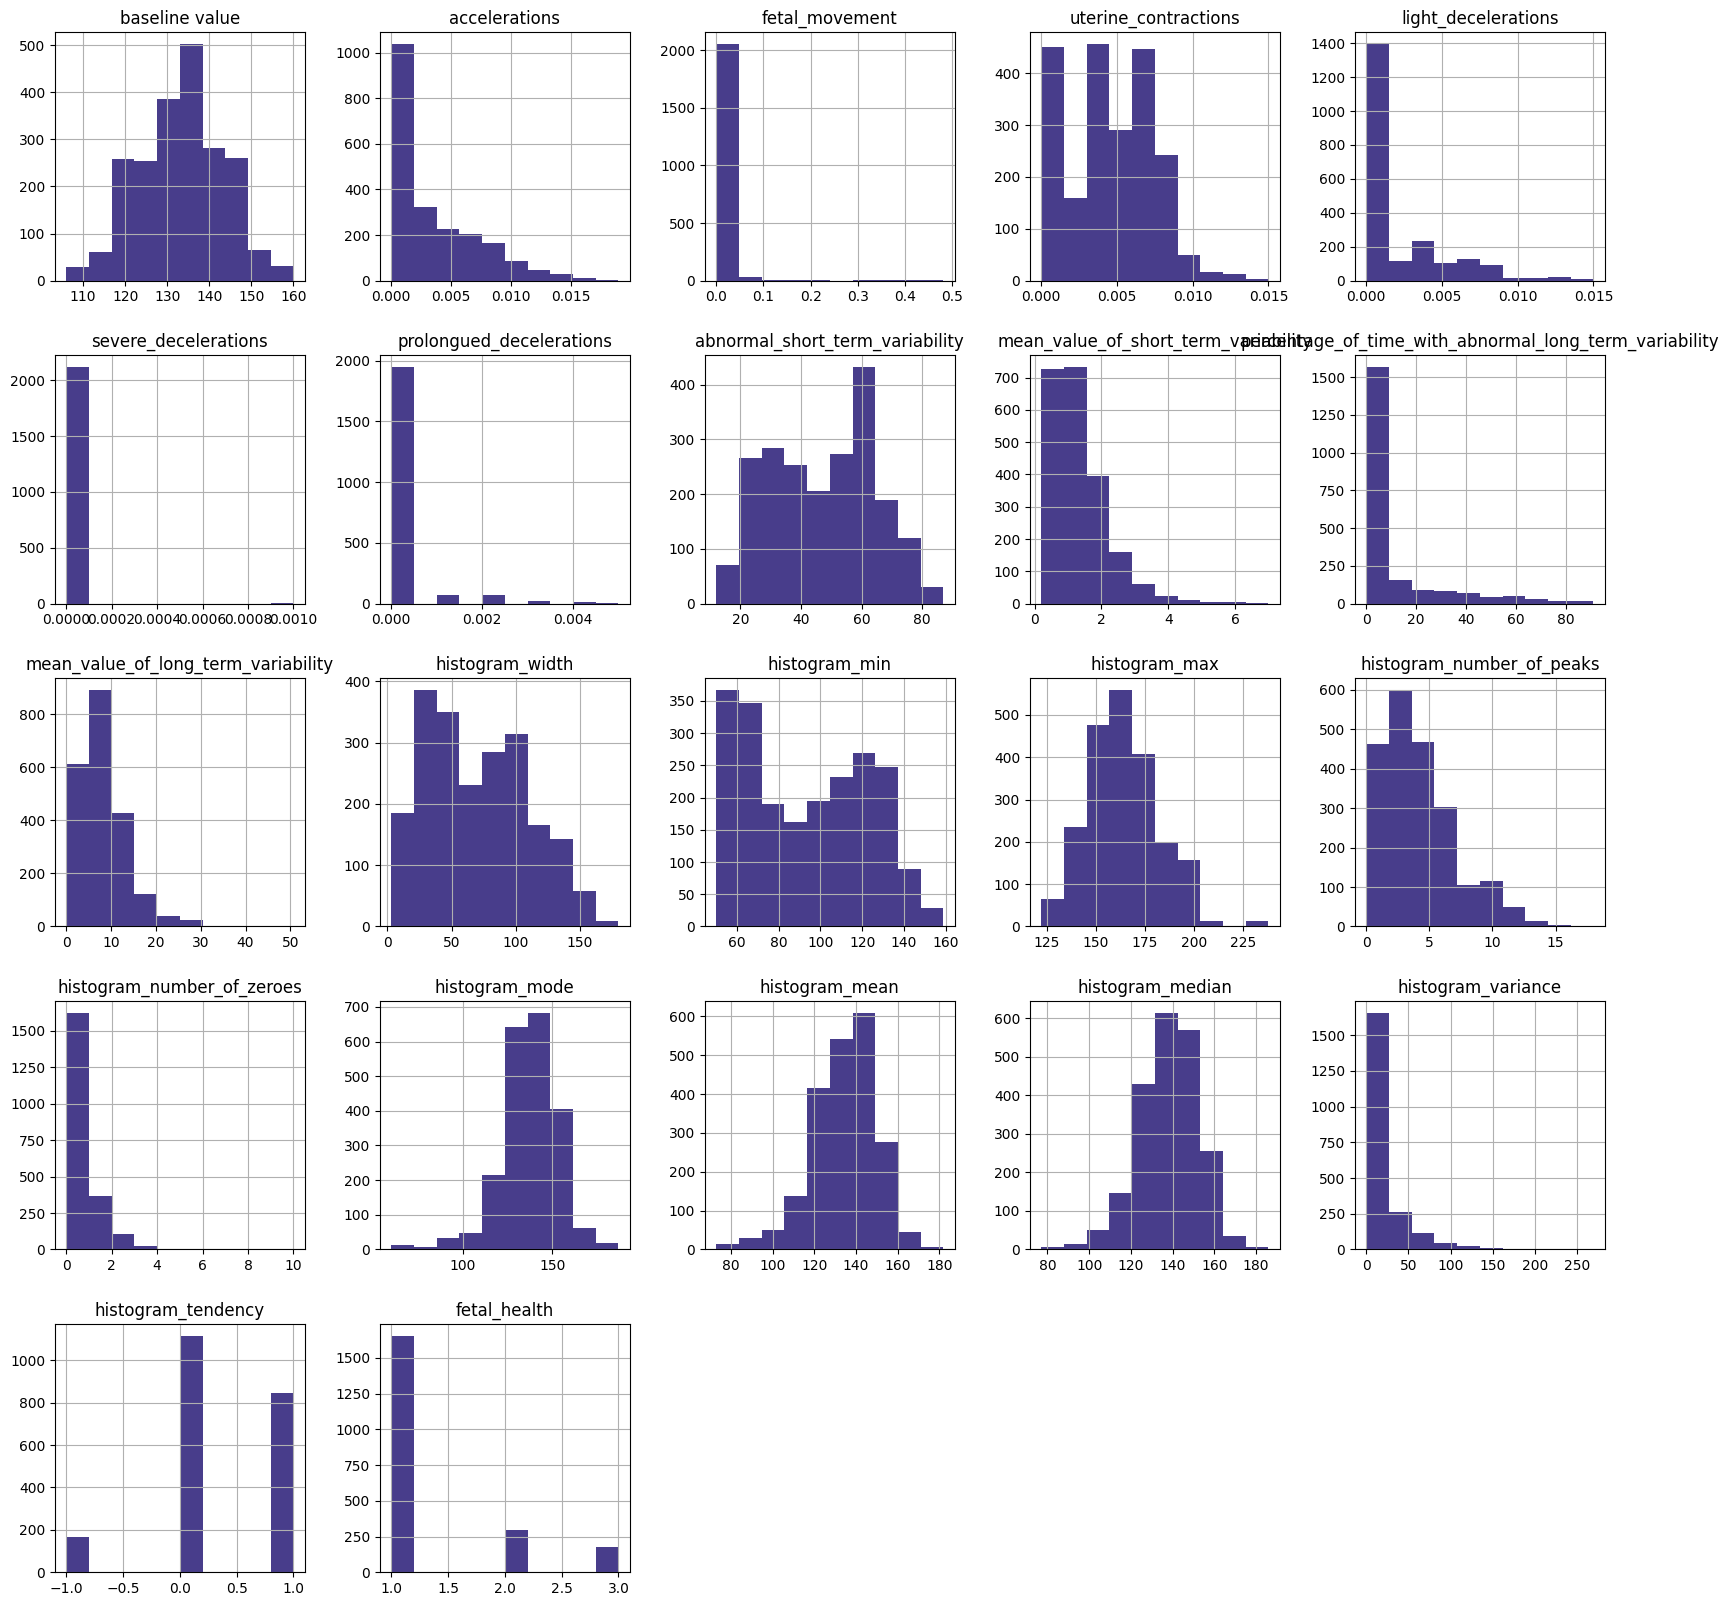

In [17]:
hist_plot = data.hist(figsize = (20,20), color = "#483D8B")

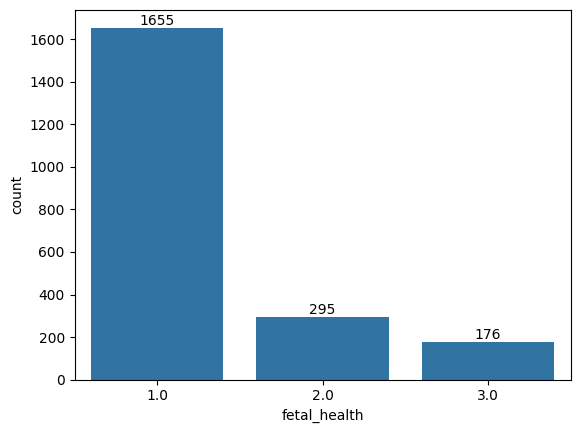

In [20]:
ax = sns.countplot(data= data, x="fetal_health")
ax.bar_label(ax.containers[0])
plt.show()

In [24]:
from sklearn.svm import SVC
X=data.drop(["fetal_health"],axis=1)
y=data["fetal_health"]
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])

pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#cross validation on accuracy
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 0.858874 
Decision Tree: 0.915341 
RandomForest: 0.939525 
SVC: 0.849469 


In [25]:
gbcl = GradientBoostingClassifier()
gbcl_model = gbcl.fit(X_train, y_train)
print(f"Baseline Gradient Boosting Classifier Score: {round(gbcl_model.score(X_test, y_test), 2)}")

pred_gbcl = gbcl_model.predict(X_test)

Baseline Gradient Boosting Classifier Score: 0.95


In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
y = data.pop('fetal_health') - 1

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=3)
for train_ids, test_ids in splitter.split(X_scaled, y):
    X_train_full, y_train_full = X_scaled[train_ids], y[train_ids]
    X_test, y_test = X_scaled[test_ids], y[test_ids]
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2)

In [35]:
class_counts = y_train.value_counts()
print(f"Class distribution:\n{class_counts}")

Class distribution:
fetal_health
1.0    1198
2.0     201
3.0     131
Name: count, dtype: int64


In [38]:
from keras import Sequential
from keras.layers import Dense, Dropout

# Callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Model Performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

name = "dense"
model = Sequential([
    Dense(32, activation='relu', kernel_initializer='he_normal'),
    Dense(64, activation='relu', kernel_initializer='he_normal'),
    Dense(128, activation='relu', kernel_initializer='he_normal'),
    Dropout(0.2),
    Dense(3, activation='softmax'),
], name=name)

# Compile
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Callbacks
cbs = [EarlyStopping(patience=3, restore_best_weights=True), ModelCheckpoint(name + ".h5", save_best_only=True)]
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=15, callbacks=cbs)

Epoch 1/15
48/48 [==============================] - 1s 8ms/step - loss: 0.8040 - accuracy: 0.7346 - val_loss: 0.4543 - val_accuracy: 0.8616
Epoch 2/15
48/48 [==============================] - 0s 3ms/step - loss: 0.4604 - accuracy: 0.8431 - val_loss: 0.3324 - val_accuracy: 0.8695
Epoch 3/15
48/48 [==============================] - 0s 4ms/step - loss: 0.3477 - accuracy: 0.8706 - val_loss: 0.2994 - val_accuracy: 0.8851
Epoch 4/15
48/48 [==============================] - 0s 3ms/step - loss: 0.3159 - accuracy: 0.8817 - val_loss: 0.2704 - val_accuracy: 0.8982
Epoch 5/15
48/48 [==============================] - 0s 3ms/step - loss: 0.2809 - accuracy: 0.8876 - val_loss: 0.2671 - val_accuracy: 0.8930
Epoch 6/15
48/48 [==============================] - 0s 3ms/step - loss: 0.2581 - accuracy: 0.8993 - val_loss: 0.2541 - val_accuracy: 0.9034
Epoch 7/15
48/48 [==============================] - 0s 4ms/step - loss: 0.2476 - accuracy: 0.8987 - val_loss: 0.2489 - val_accuracy: 0.9060
Epoch 8/15
48/48 [==

In [39]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2372 - accuracy: 0.9249


[0.23721960186958313, 0.9248826503753662]

In [40]:
pred = np.argmax(model.predict(X_test), axis=1)

# Calculate Score
acc_score = accuracy_score(y_test, pred)
pre_score = precision_score(y_test, pred, average='macro')
re_score = recall_score(y_test, pred, average='macro')
f_score = f1_score(y_test, pred, average='macro')

# Show Prediction
print("Accuracy Score  : {:.6}".format(acc_score))
print("Precision Score : {:.6}".format(pre_score))
print("Recall Score    : {:.6}".format(re_score))
print("f1 Score        : {:.6}".format(f_score))

7/7 [==============================] - 0s 2ms/step
Accuracy Score  : 0.924883
Precision Score : 0.845022
Recall Score    : 0.861423
f1 Score        : 0.852405
